In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle

In [2]:
# Dataset from: https://www.kaggle.com/msambare/fer2013

In [3]:
# Constants:

classes_num = 7
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Train_DIR = "C:\\Users\\USER\\Desktop\\ML-Projects\\Face_Emotion_Recognition\\Data\\train"
Test_DIR = "C:\\Users\\USER\\Desktop\\ML-Projects\\Face_Emotion_Recognition\\Data\\test"
Project_DIR = "C:\\Users\\USER\\Desktop\\ML-Projects\\Face_Emotion_Recognition"

Training_10118481.jpg


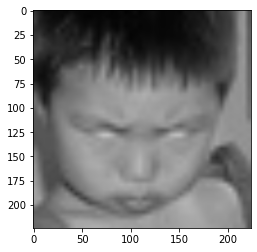

In [4]:
# Visualize dataset:

for category in classes:
    category_path = os.path.join(Train_DIR, category)
    for img in os.listdir(category_path):
        print(img)
        img_array = cv2.resize(cv2.imread(os.path.join(category_path, img)), (224, 224))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
# Training and testing set generators:

# one-hot:
def label_img(category):
    arr = np.zeros((classes_num,), dtype = int)
    arr[classes.index(category), ] = 1
    return arr

img_size = 128
train = []
test = []
def create_train_set(img_size):
    for category in classes:
        category_path = os.path.join(Train_DIR, category)
        label = label_img(category)
        for img in os.listdir(category_path):
            img_array = cv2.resize(cv2.imread(os.path.join(category_path, img)), (img_size, img_size))
            train.append([np.array(img_array), np.array(label)])
            
def create_test_set(img_size):
    for category in classes:
        category_path = os.path.join(Test_DIR, category)
        label = label_img(category)
        for img in os.listdir(category_path):
            img_array = cv2.resize(cv2.imread(os.path.join(category_path, img)), (img_size, img_size))
            test.append([np.array(img_array), np.array(label)])
            
create_train_set(img_size)
create_test_set(img_size)

train = np.array(train)
test = np.array(test)

In [6]:
np.save(os.path.join(Project_DIR, "combined_train_set.npy"), train)
np.save(os.path.join(Project_DIR, "test_set.npy"), test)

In [8]:
# CREATING VALIDATION SET FROM A SUBSET OF TRAINING SET:

valTOtrain_split_ratio = 0.2  # (val / total)
num = int(((1 - valTOtrain_split_ratio)*train.shape[0]))
train_set = train[:num]
val_set = train[num:]

In [9]:
print(train_set.shape)
print(val_set.shape)

(22967, 2)
(5742, 2)


In [10]:
X_train = np.array([i[0] for i in train_set]).reshape(-1, img_size, img_size, 3)
y_train = np.array([i[1] for i in train_set])

print(X_train.shape)
print(y_train.shape)


X_val = np.array([i[0] for i in val_set]).reshape(-1, img_size, img_size, 3)
y_val = np.array([i[1] for i in val_set])

print(X_val.shape)
print(y_val.shape)

X_test = np.array([i[0] for i in test]).reshape(-1, img_size, img_size, 3)
y_test = np.array([i[1] for i in test])

print(X_test.shape)
print(y_test.shape)

(22967, 128, 128, 3)
(22967, 7)
(5742, 128, 128, 3)
(5742, 7)
(7178, 128, 128, 3)
(7178, 7)


In [11]:
np.save(os.path.join(Project_DIR, "X_train.npy"), X_train)
np.save(os.path.join(Project_DIR, "y_train.npy"), y_train)

np.save(os.path.join(Project_DIR, "X_val.npy"), X_val)
np.save(os.path.join(Project_DIR, "y_val.npy"), y_val)

In [12]:
np.save(os.path.join(Project_DIR, "X_test.npy"), X_test)
np.save(os.path.join(Project_DIR, "y_test.npy"), y_test)

In [5]:
# RUN THIS:

X_train = np.load(os.path.join(Project_DIR, "Numpy_Arrays", "X_train.npy"))
X_val = np.load(os.path.join(Project_DIR, "Numpy_Arrays", "X_val.npy"))
X_test = np.load(os.path.join(Project_DIR, "Numpy_Arrays", "X_test.npy"))

y_train = np.load(os.path.join(Project_DIR, "Numpy_Arrays", "y_train.npy"))
y_val = np.load(os.path.join(Project_DIR, "Numpy_Arrays", "y_val.npy"))
y_test = np.load(os.path.join(Project_DIR, "Numpy_Arrays", "y_test.npy"))

In [6]:
print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

# We skip normalization of datasets as my PC is unable to normalize such large numpy arrays

(22967, 128, 128, 3)
(22967, 7)
(5742, 128, 128, 3)
(5742, 7)
(7178, 128, 128, 3)
(7178, 7)


In [6]:
# We shall train some models with transfer learning first:

img_size = 128
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow.keras.applications

# resnet_model = ResNet50(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')

ERROR! Session/line number was not unique in database. History logging moved to new session 313


In [4]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10, cifar100
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

Using TensorFlow backend.


In [8]:
# Model1 using the mobile_net as the base model

for layer in mobilenet_model.layers:
   layer.trainable = False
for layer in mobilenet_model.layers[-14:]:
   layer.trainable = True

# **IMPORTANT**
# let's visualize layer names and layer indices to see how many layers we should freeze:
# for i, layer in enumerate(resnet_model.layers):
#    print(i, layer.name)

model1 = Sequential()
model1.add(mobilenet_model)

model1.add(Flatten())
model1.add(BatchNormalization())

model1.add(Dense(classes_num, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 20480)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 20480)             81920     
_________________________________________________________________
dense (Dense)                (None, 7)                 143367    
Total params: 2,483,271
Trainable params: 1,224,327
Non-trainable params: 1,258,944
_________________________________________________________________


In [10]:
# Couldn't use data augmentation due to memory limitation.
# 3 + 10 epochs:

model1.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, batch_size = 128, epochs=10, validation_data=(X_val, y_val))

Train on 22967 samples, validate on 5742 samples
Epoch 1/10
22967/22967 [==============================] - 341s 15ms/sample - loss: 0.8755 - accuracy: 0.7139 - val_loss: 20.7680 - val_accuracy: 0.0012
Epoch 2/10
22967/22967 [==============================] - 436s 19ms/sample - loss: 0.6875 - accuracy: 0.7749 - val_loss: 39.0862 - val_accuracy: 0.0000e+00
Epoch 3/10
22967/22967 [==============================] - 436s 19ms/sample - loss: 0.5117 - accuracy: 0.8340 - val_loss: 29.6083 - val_accuracy: 0.0023
Epoch 4/10
22967/22967 [==============================] - 436s 19ms/sample - loss: 0.4682 - accuracy: 0.8491 - val_loss: 46.3194 - val_accuracy: 0.0028
Epoch 5/10
22967/22967 [==============================] - 436s 19ms/sample - loss: 0.4308 - accuracy: 0.8645 - val_loss: 75.8165 - val_accuracy: 0.0000e+00
Epoch 6/10
22967/22967 [==============================] - 436s 19ms/sample - loss: 0.3573 - accuracy: 0.8902 - val_loss: 80.2613 - val_accuracy: 0.0000e+00
Epoch 7/10
22967/22967 [===

In [11]:
# Checkpoint
model1.save_weights(os.path.join(Project_DIR, "model1", "model1_mobileNet_FineTuned"), save_format = "tf")

In [9]:
model1.load_weights(os.path.join(Project_DIR, "model1", "model1_mobileNet_FineTuned"))

ERROR! Session/line number was not unique in database. History logging moved to new session 274


In [12]:
# Accuracy of model1:
# After training for 1.5 hrs: 16.94

# 16.94 => (halted)

print(y_test.shape)
predictions = model1.predict(X_test)
print(predictions.shape)
classes = np.array(tf.one_hot(tf.argmax(predictions, axis = 1), depth = classes_num))
classes = classes.astype(int)
sum = np.sum(classes == y_test)
accuracy = (sum - (y_test.shape[0] * (classes_num - 2))) / (2 * y_test.shape[0])

print('Accuracy on the testing set is: ', accuracy * 100)

(7178, 7)
ERROR! Session/line number was not unique in database. History logging moved to new session 275
(7178, 7)
Accuracy on the testing set is:  16.940651992198383


In [8]:
model2 = Sequential()
model2.add(mobilenet_model)

model2.add(Flatten())

model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.20))
model2.add(BatchNormalization())

model2.add(Dense(classes_num, activation='softmax'))

model2.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 258
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 20480)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                1024050   
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 357       
Total params: 3,282,591
Tr

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, batch_size = 128, epochs=4, validation_data=(X_val, y_val))

In [ ]:
# The following are predictions of model2 on the testing set after training for 5 hours locally in breaks

# Progress: 30 => 36 => 36.5 => 35.1 => 32.66 => 38.83 => 21.05

print(X_test.shape)
print(y_test.shape)

predictions = model2.predict(X_test)
print(predictions.shape)

# print("Predictions: ", predictions)
classes = np.array(tf.one_hot(tf.argmax(predictions, axis = 1), depth = classes_num))
classes = classes.astype(int)

print(classes.shape)
print(np.sum(classes == y_test) + np.sum(classes != y_test))

print(classes == y_test)
sum = np.sum(classes == y_test)
print("Sum is: ", sum)
print("y_train.shape[0] = ", y_test.shape[0])

# By derivation: accuracy = (sum - m * (n - 2)) / (2 * m), n = num of classes, m = y_test.shape[0]

accuracy = (sum - (y_test.shape[0] * (classes_num - 2))) / (2 * y_test.shape[0])
print('Accuracy on the testing set is: ', accuracy * 100)

In [ ]:
# Checkpoint: Save model2 and train later

# ** REMEMBER: Always save and load models as follows if you want to resume training from where you left last**

# model.save_weights('My_weights_tf',save_format='tf')
# model.load_weights('My_weights_tf')

# Previous training accuracy = 0.92

model2.save_weights(os.path.join(Project_DIR, "model2", "model2_mobilenetV2"), save_format = "tf")

In [ ]:
# Before loading the model, build the model again by running the appropriate cell with randomly initialized weights
# As we only saved the model weights, not the architecture

model2.load_weights(os.path.join(Project_DIR, "model2", "model2_mobilenetV2"))

In [13]:
# MODEL3 (Custom):

model3 = Sequential()

model3.add(Conv2D(8, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (img_size, img_size, 3)))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(BatchNormalization())

model3.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(BatchNormalization())

model3.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(BatchNormalization())

model3.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(BatchNormalization())

model3.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(BatchNormalization())

model3.add(Conv2D(256, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(BatchNormalization())

model3.add(Flatten())

model3.add(Dense(200, activation='relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

model3.add(Dense(160, activation='relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())

model3.add(Dense(120, activation='relu'))

model3.add(Dense(classes_num, activation='softmax'))

model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 8)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 8)         32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)       

In [10]:
# 30 + 20 epochs:
model3.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, batch_size = 128, epochs=20, validation_data=(X_val, y_val))

Train on 22967 samples, validate on 5742 samples
Epoch 1/20
ERROR! Session/line number was not unique in database. History logging moved to new session 269
22967/22967 [==============================] - 139s 6ms/sample - loss: 0.0813 - accuracy: 0.9720 - val_loss: 13.8984 - val_accuracy: 0.1043
Epoch 2/20
22967/22967 [==============================] - 139s 6ms/sample - loss: 0.0679 - accuracy: 0.9770 - val_loss: 14.9252 - val_accuracy: 0.1257
Epoch 3/20
22967/22967 [==============================] - 138s 6ms/sample - loss: 0.0590 - accuracy: 0.9802 - val_loss: 15.2621 - val_accuracy: 0.1003
Epoch 4/20
22967/22967 [==============================] - 138s 6ms/sample - loss: 0.0603 - accuracy: 0.9788 - val_loss: 15.0652 - val_accuracy: 0.1230
Epoch 5/20
22967/22967 [==============================] - 138s 6ms/sample - loss: 0.0686 - accuracy: 0.9773 - val_loss: 14.0797 - val_accuracy: 0.1304
Epoch 6/20
22967/22967 [==============================] - 139s 6ms/sample - loss: 0.0557 - accuracy:

In [19]:
# Checkpoint
model3.save_weights(os.path.join(Project_DIR, "model3", "model3"), save_format = "tf")

In [14]:

model3.load_weights(os.path.join(Project_DIR, "model3", "model3"))

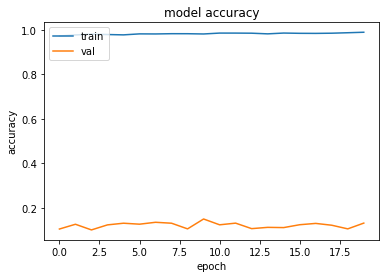

In [13]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

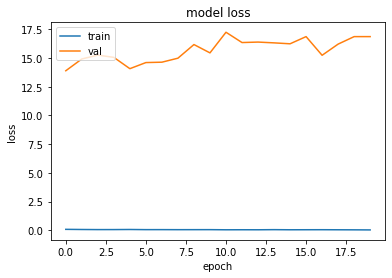

In [14]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
# Accuracy of custom built model (3):
# X_test /= 255.0

print(y_test.shape)
predictions = model3.predict(X_test)
print(predictions.shape)
classes = np.array(tf.one_hot(tf.argmax(predictions, axis = 1), depth = classes_num))
classes = classes.astype(int)
sum = np.sum(classes == y_test)

accuracy = (sum - (y_test.shape[0] * (classes_num - 2))) / (2 * y_test.shape[0])
print('Accuracy on the testing set is: ', accuracy * 100)

(7178, 128, 128, 3)
(7178, 7)
(7178, 7)
(7178, 7)
50246
[[False  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True False  True]
 ...
 [ True  True False ...  True  True False]
 [False  True  True ...  True  True False]
 [ True  True False ...  True  True False]]
Sum is:  42982
y_train.shape[0] =  7178
Accuracy on the testing set is:  49.400947339091665


In [23]:
# MODEL4 (Custom):

model4 = Sequential()

model4.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (img_size, img_size, 3)))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(BatchNormalization())

model4.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(BatchNormalization())

model4.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(BatchNormalization())

model4.add(Conv2D(256, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Conv2D(256, kernel_size = (3,3), activation = 'relu', padding = 'valid'))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(BatchNormalization())

model4.add(Flatten())
model4.add(BatchNormalization())

model4.add(Dense(classes_num, activation='softmax'))

model4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_73 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_74 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 32, 32, 128)     

In [ ]:
# Same model trained with DATA AUGMENTATION:
# ==> RAM can't handle data augmentation. So training fails

from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
)

# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=64)


# fit model:
steps = int(X_train.shape[0] / 64)
model4.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history4 = model4.fit(it_train, steps_per_epoch=steps, epochs=3, validation_data=(X_val, y_val))

In [8]:
# Model5 using the mobile_net as the base model. The model was trained on google colab for 1hr. Data augmentation was used.

model5 = Sequential()
model5.add(mobilenet_model)

model5.add(Flatten())
model5.add(BatchNormalization())

model5.add(Dense(classes_num, activation='softmax'))

model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 20480)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 20480)             81920     
_________________________________________________________________
dense (Dense)                (None, 7)                 143367    
Total params: 2,483,271
Trainable params: 2,408,199
Non-trainable params: 75,072
_________________________________________________________________


In [ ]:
# Weights downloaded from colab:
model5.load_weights(os.path.join(Project_DIR, "model_mobilenet"))

In [10]:
# Predictions of the model:

print(y_test.shape)
predictions = model5.predict(X_test)
print(predictions.shape)
classes = np.array(tf.one_hot(tf.argmax(predictions, axis = 1), depth = classes_num))
classes = classes.astype(int)
sum = np.sum(classes == y_test)

accuracy = (sum - (y_test.shape[0] * (classes_num - 2))) / (2 * y_test.shape[0])
print('Accuracy on the testing set is: ', accuracy * 100)

(7178, 7)
(7178, 7)
Accuracy on the testing set is:  39.885762050710504


In [16]:
# model6 using the mobile_net as the base model, trained on Kaggle. Input = (224, 224)
img_size = 224
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')

model6 = Sequential()
model6.add(mobilenet_model)

model6.add(Flatten())
model6.add(BatchNormalization())

model6.add(Dense(classes_num, activation='softmax'))

model6.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_3 (Flatten)          (None, 62720)             0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 62720)             250880    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 439047    
Total params: 2,947,911
Trainable params: 2,788,359
Non-trainable params: 159,552
_________________________________________________________________


In [21]:
# Model trained on Colab
# model6 = Sequential()
model6.load_weights(os.path.join(Project_DIR, "model_mobilenet", "model_mobilenet_input_224_50_epochs.h5"))

In [8]:
# Model7 using the resnet_model as the base model, trained on colab. Input = (224, 224)
img_size = 224
resnet_model = ResNet50(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')

for layer in resnet_model.layers:
   layer.trainable = False
for layer in resnet_model.layers[-75:]:
   layer.trainable = True

model7 = Sequential()
model7.add(resnet_model)

model7.add(Flatten())
model7.add(BatchNormalization())

model7.add(Dense(classes_num, activation='softmax'))

model7.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 100352)            401408    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 702471    
Total params: 24,691,591
Trainable params: 20,356,103
Non-trainable params: 4,335,488
_________________________________________________________________


In [13]:
# **REMEMBER**: Always save and load model weights in .h5 format when training on kaggle or colab

# Model7 trained on Kaggle:

model7.load_weights(os.path.join(Project_DIR, 'model_resnet_FineTuned_Large', "model_resnet_FineTuned_100ep.h5"))

In [24]:
# Testing models 6 and 7:

img_size = 224

def label_img(category):
    arr = np.zeros((classes_num,), dtype = int)
    arr[classes.index(category), ] = 1
    return arr

test = []
# train = []

def create_test_set(img_size):
    for category in classes:
        imgs = 0
        category_path = os.path.join(Test_DIR, category)
        label = label_img(category)
        for img in os.listdir(category_path):
            imgs = imgs + 1
            if imgs == 600:
                break
            img_array = cv2.resize(cv2.imread(os.path.join(category_path, img)), (img_size, img_size))
            test.append([np.array(img_array), np.array(label)])

# def create_train_set(img_size):
#     for category in classes:
#         imgs = 0
#         category_path = os.path.join(Train_DIR, category)
#         label = label_img(category)
#         for img in os.listdir(category_path):
#             imgs = imgs + 1
#             if imgs == 600:
#                 break
#             img_array = cv2.resize(cv2.imread(os.path.join(category_path, img)), (img_size, img_size))
#             train.append([np.array(img_array), np.array(label)])

        
create_test_set(img_size)
# create_train_set(img_size)

# train = np.array(train)
test = np.array(test)
# shuffle(train)
shuffle(test)

X_test = np.array([i[0] for i in test]).reshape(-1, img_size, img_size, 3)
y_test = np.array([i[1] for i in test])

# X_train = np.array([i[0] for i in train]).reshape(-1, img_size, img_size, 3)
# y_train = np.array([i[1] for i in train])

print(X_test.shape)
print(y_test.shape)

# print(X_train.shape)
# print(y_train.shape)

del test
# del train

C:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


(3705, 224, 224, 3)
(3705, 7)


In [25]:
# Model6: Optimized with Adam and learning rate = 3e-4
# (For the entire test set)
# Training Accuracy = 60.06% after 50 epochs
# Training Accuracy = 60.67%  after 70 epochs (near peak performance, after which validation loss increases)

print(y_test.shape)
predictions = model6.predict(X_test)
print(predictions.shape)
classes = np.array(tf.one_hot(tf.argmax(predictions, axis = 1), depth = classes_num))
classes = classes.astype(int)
sum_ = np.sum(classes == y_test)
accuracy = (sum_ - (y_test.shape[0] * (classes_num - 2))) / (2 * y_test.shape[0])

print('Accuracy on the testing set is: ', accuracy * 100)

(3705, 7)
(3705, 7)
Accuracy on the testing set is:  59.32523616734143


In [12]:
# As expected, predictions on a subset of the training set are very accurate:
# But the accuracy is still less than 90% which was observed while training the model on Kaggle notebook
# This suggests that accuracy depends on the subset of training set we choose. This is not surprising as the dataset contains
# far more images for happy or neutral as compared to disgust. This is also the reason why all
# the models built so far are unable to recognize disgust

print(y_train.shape)
predictions = model6.predict(X_train)
print(predictions.shape)
classes = np.array(tf.one_hot(tf.argmax(predictions, axis = 1), depth = classes_num))
classes = classes.astype(int)
sum_ = np.sum(classes == y_train)
accuracy = (sum_ - (y_train.shape[0] * (classes_num - 2))) / (2 * y_train.shape[0])

print('Accuracy on the training set is: ', accuracy * 100)

(4030, 7)
(4030, 7)
Accuracy on the training set is:  78.85856079404466


In [14]:
# Model7: Optimized with Adam and learning rate = 3e-4

# Note that the number of examples from each category has been limited to 600 in the testing set.
# This is mainly done to reduce the computational cost of prediction. 

# Model 7 starts overfitting early and validation accuracy seems to be constant at around 67% after 10 epochs
# Training Accuracy =  59.11% after 25 epochs
# Training Accuracy = 58.65%  after 100 epochs (near peak performance, after which validation loss increases)

print(y_test.shape)
predictions = model7.predict(X_test)
print(predictions.shape)
classes = np.array(tf.one_hot(tf.argmax(predictions, axis = 1), depth = classes_num))
classes = classes.astype(int)
sum = np.sum(classes == y_test)
accuracy = (sum - (y_test.shape[0] * (classes_num - 2))) / (2 * y_test.shape[0])

print('Accuracy on the testing set is: ', accuracy * 100)

(3705, 7)
(3705, 7)
Accuracy on the testing set is:  58.65047233468286


# Live Webcam Testing:

In [40]:
# Code inspired from: https://medium.com/analytics-vidhya/realtime-face-emotion-recognition-using-transfer-learning-in-tensorflow-3add4f4f3ff3

import cv2
import numpy as np

img_size = 224
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

path = os.path.join(Project_DIR, "haarcascade_frontalface_default.xml")
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))
text = "Hello"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] - 25

# 2 pixels for padding
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0, 0, 0), thickness = 1)

face_roi = X_test[1000]
x = 1
y = 1
w = 1
h = 1
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam!")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(path)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)  # 1.1 is the scaleFactor (google), 4 : min neighbours
    for x, y, w, h in faces:
        roi_gray = gray[y : y + h, x : x + w]  # roi = region of interest
        roi_color = frame[y : y + h, x : x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) != 0:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey + eh, ex : ex + ew]  # crop the face to get the roi
                
    # RESIZE THE IMAGE:
    final_image = cv2.resize(face_roi, (img_size, img_size))
    final_image = np.expand_dims(final_image, axis = 0)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # SET THE MODEL to be used for prediction:
    Predictions = model6.predict(final_image)
    class_num = np.argmax(Predictions)   # **Provides the index of the max argument
    
    status = classes[class_num]
    x1, y1, w1, h1 = 0, 0, 175, 75
    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
    cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), font, 0.7, (0, 0, 255), 2)
    cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))
    
    cv2.imshow("Live Facial Expression Recognition", frame)
    
    # The following line is to enable closing of webcam using 'q' key
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
# Progress:

# 1) model3 can easily detect these emotions: happy, neutral, angry and fear. It is also the model with highest testing accuracy
#    that could achieve 50 % within just 1.5 hours of training. With that being said, it highly overfit the dataset and 
#    the validation loss only kept growing with epochs. It is certainly useless to train the model any furhter

# 2) Although model2 provides low accuracy currently, it could attain high accuracy if it were left to train for a few more hours

# 3) Since model2 demands more training time, I modified it and fine tuned mobileNet. Model1 is replaced with this modeified model.
#    Update1: Model1 seems to be more promising than model2 and I will continue to train it for a few hours
#    Update2: Even Model1 starts overfitting early and the testing accuracy keeps fluctuating.

# 4) model5 trained on colab can easily detect these emotions: happy, neutral, angry. This is still worse than the custom built
#    model3(which also had very few training parameters). Now I will try to train model5 on (224, 224) images as it seems
#    to be a better model than model3. This model will be model6

# 5) After tuning the hyperparameters carefully and training the models 6 and 7 for several hours,
#    I have managed to achieve a high accuracy on both of the models. 

# Final Results:

In [ ]:
# (Only results of models 6 and 7 are mentioned as those are the most accurate and meticulously trained models)

###############################################################################################################################
#                                                                                                                             #
#  Model6:                                                                                                                    #
#  Based on MobileNetV2                                                                                                       #
#  Peak Testing Accuracy = 60.67%                                                                                             #
#                                                                                                                             #
#  Can detect:                                                                                                                #
#                                                                                                                             #
#  Always (almost): Happy, Neutral, Angry (prediction is slightly unstable), Sad, Fear                                        #
#  Often: Disgust (it shows if you make some specific faces)                                                                  #
#  Rarely: Surprise (model confuses it for fear)                                                                              #
#                                                                                                                             #
#                                                                                                                             #
#  Model7:                                                                                                                    #
#  Based on Resnet50                                                                                                          #
#  Peak Training Accuracy = 59.11%                                                                                            #
#  (Couldn't test it on webcam)                                                                                               #
#                                                                                                                             #
#  Remarks:                                                                                                                   #
#  1) Overall model6 has the best testing accuracy and it also performs good on the live webcam test.                         #
#  2) The webcam becomes laggy with model7 as resnet50 has a lot of parameters. Because of this, model is unable to           #
#     predict on live webcam. Nonetheless, it should perform at most as good as model6, given their testing accuracies.       #
#  3) Test the live model with a homogeneous background and good illumination for better results.                             #
#  4) (unrelated) Kaggle GPUs are faster than Colab's GPUs and runtimes are more stable. But memory managment is complex      #
#     on Kaggle notebooks and you must cautiously use RAM.                                                                    #
#  5) (unrelated) Save and download model weights in .h5 format after training your models online.                            #
#                                                                                                                             #
###############################################################################################################################